In [2]:
import mailbox
mbox = mailbox.mbox('myFile.mbox')


In [3]:
sample = mbox[6]

In [4]:
print(sample.keys())

['X-GM-THRID', 'X-Gmail-Labels', 'Delivered-To', 'Received', 'X-Google-Smtp-Source', 'X-Received', 'ARC-Seal', 'ARC-Message-Signature', 'ARC-Authentication-Results', 'Return-Path', 'Received', 'Received-SPF', 'Authentication-Results', 'DKIM-Signature', 'DomainKey-Signature', 'Date', 'To', 'From', 'Reply-To', 'Subject', 'Message-ID', 'X-YExC-Campaign-Uid', 'X-YExC-Subscriber-Uid', 'X-YExC-Customer-Uid', 'List-Unsubscribe', 'Feedback-ID', 'Precedence', 'X-YExC-Mailer', 'Content-Type', 'MIME-Version']


In [5]:
import mailbox
from cleantext import clean
def getcharsets(msg):
    charsets = set({})
    for c in msg.get_charsets():
        if c is not None:
            charsets.update([c])
    return charsets

def handleerror(errmsg, emailmsg,cs):
    print()
    print(errmsg)
    print("This error occurred while decoding with ",cs," charset.")
    print("These charsets were found in the one email.",getcharsets(emailmsg))
    print("This is the subject:",emailmsg['subject'])
    print("This is the sender:",emailmsg['From'])

def getbodyfromemail(msg):
    body = None
    #Walk through the parts of the email to find the text body.    
    if msg.is_multipart():    
        for part in msg.walk():

            # If part is multipart, walk through the subparts.            
            if part.is_multipart(): 

                for subpart in part.walk():
                    if subpart.get_content_type() == 'text/plain':
                        # Get the subpart payload (i.e the message body)
                        body = subpart.get_payload(decode=True) 
                        #charset = subpart.get_charset()

            # Part isn't multipart so get the email body
            elif part.get_content_type() == 'text/plain':
                body = part.get_payload(decode=True)
                #charset = part.get_charset()

    # If this isn't a multi-part message then get the payload (i.e the message body)
    elif msg.get_content_type() == 'text/plain':
        body = msg.get_payload(decode=True) 

   # No checking done to match the charset with the correct part. 
    for charset in getcharsets(msg):
        try:
            body = body.decode(charset)
        except UnicodeDecodeError:
            handleerror("UnicodeDecodeError: encountered.",msg,charset)
        except AttributeError:
             handleerror("AttributeError: encountered" ,msg,charset)
    return body    


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [6]:
def getcharsets(msg):
    charsets = set({})
    for c in msg.get_charsets():
        if c is not None:
            charsets.update([c])
    return charsets

def getBody(msg):
    while msg.is_multipart():
        msg=msg.get_payload()[0]
    t=msg.get_payload(decode=True)
    for charset in getcharsets(msg):
        t=t.decode(charset)
    return t
emailCounts = 0
emails = []
for i in mbox:
    try:
        emails.append(((getBody(i)),i['From'],i['To']))
        emailCounts = emailCounts+1
    except:
        continue
emailCounts

32169

In [32]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []

    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(50, 50), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

In [10]:
import pandas as pd
email_df = pd.DataFrame(emails,columns = ['body','from','to'])

In [36]:
email_df['body'][10]

'- Simplified Recruiting and Dear S , Hi , from !!! Please find the job description below and leave your here . Title : Python Developer Location : , CA Duration : Contract Client : Cognizant Job Description : 4 + working experience in system integration development degree in , CE or Strong real - life experience in python development specifically – Design , develop , test , deploy , maintain and improve . Experience in Python and common python Good to have knowledge of at least one Python web framework Example : , Flask , FAST Able to integrate multiple data and into one system / Nose for Unit Testing . Experience with source control such as Git , , and build and continuous integration . Object and data modeling good familiarity with open - source , and ( such as , .), understand the architecture Integration design and development Web , SOAP , and and Thanks and , . C Technical Recruiter , E - mail : . c @ . Phone : 678 - 720 - 5791 : . . To from future or to update your here .'

In [12]:
from bs4 import BeautifulSoup
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
email_df['body'] = email_df['body'].apply(strip_html_tags)


C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://olke.gripmail.in/campaigns/ff296dax0m010/track-url/ty370oosp2795/7014de32e27e7b08fe251238ebae4bc18316d0d4
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://olke.gripmail.in/campaigns/fj1924ww8rf0b/track-url/ty370oosp2795/fc194b193cfd110c54a414214d349daa94e15d1c
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://olke.gripmai

C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "https://drive.google.com/drive/folders/1ZJyPTYezkVGAXJhv2YPumHVoi0Z0xP-Z?usp=sharing
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://www.saha.ac.in/web/portal/applications/vacancy/file/Project%20Assistant.pdf
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "https://drive.google.com/file/d/0B8Nffj_0HB_BOU1XVC1MY1RsTkU/view?usp=sharing

C:\Users\ag23489\.conda\envs\mypy36\lib\site-packages\bs4\__init__.py:389: UserWarning: "http://olke.gripmail.in/campaigns/no034v2945f57/track-url/ty370oosp2795/5d2990bc58055a15c2a584595069dd5cc3de1a10
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [13]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

email_df['body'] = email_df['body'].apply(clean_sent)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ag23489\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
email_df['to'] = email_df['to'].fillna(value ='rsemails1@gmail.com' )

In [16]:
stopwords = ENGLISH_STOP_WORDS.union(['font','http','https','color','body','height','table','width','www'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)

X = vect.fit_transform(email_df.body)
features = vect.get_feature_names()


n_clusters = 10
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)


X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)


label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514","#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]


centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)


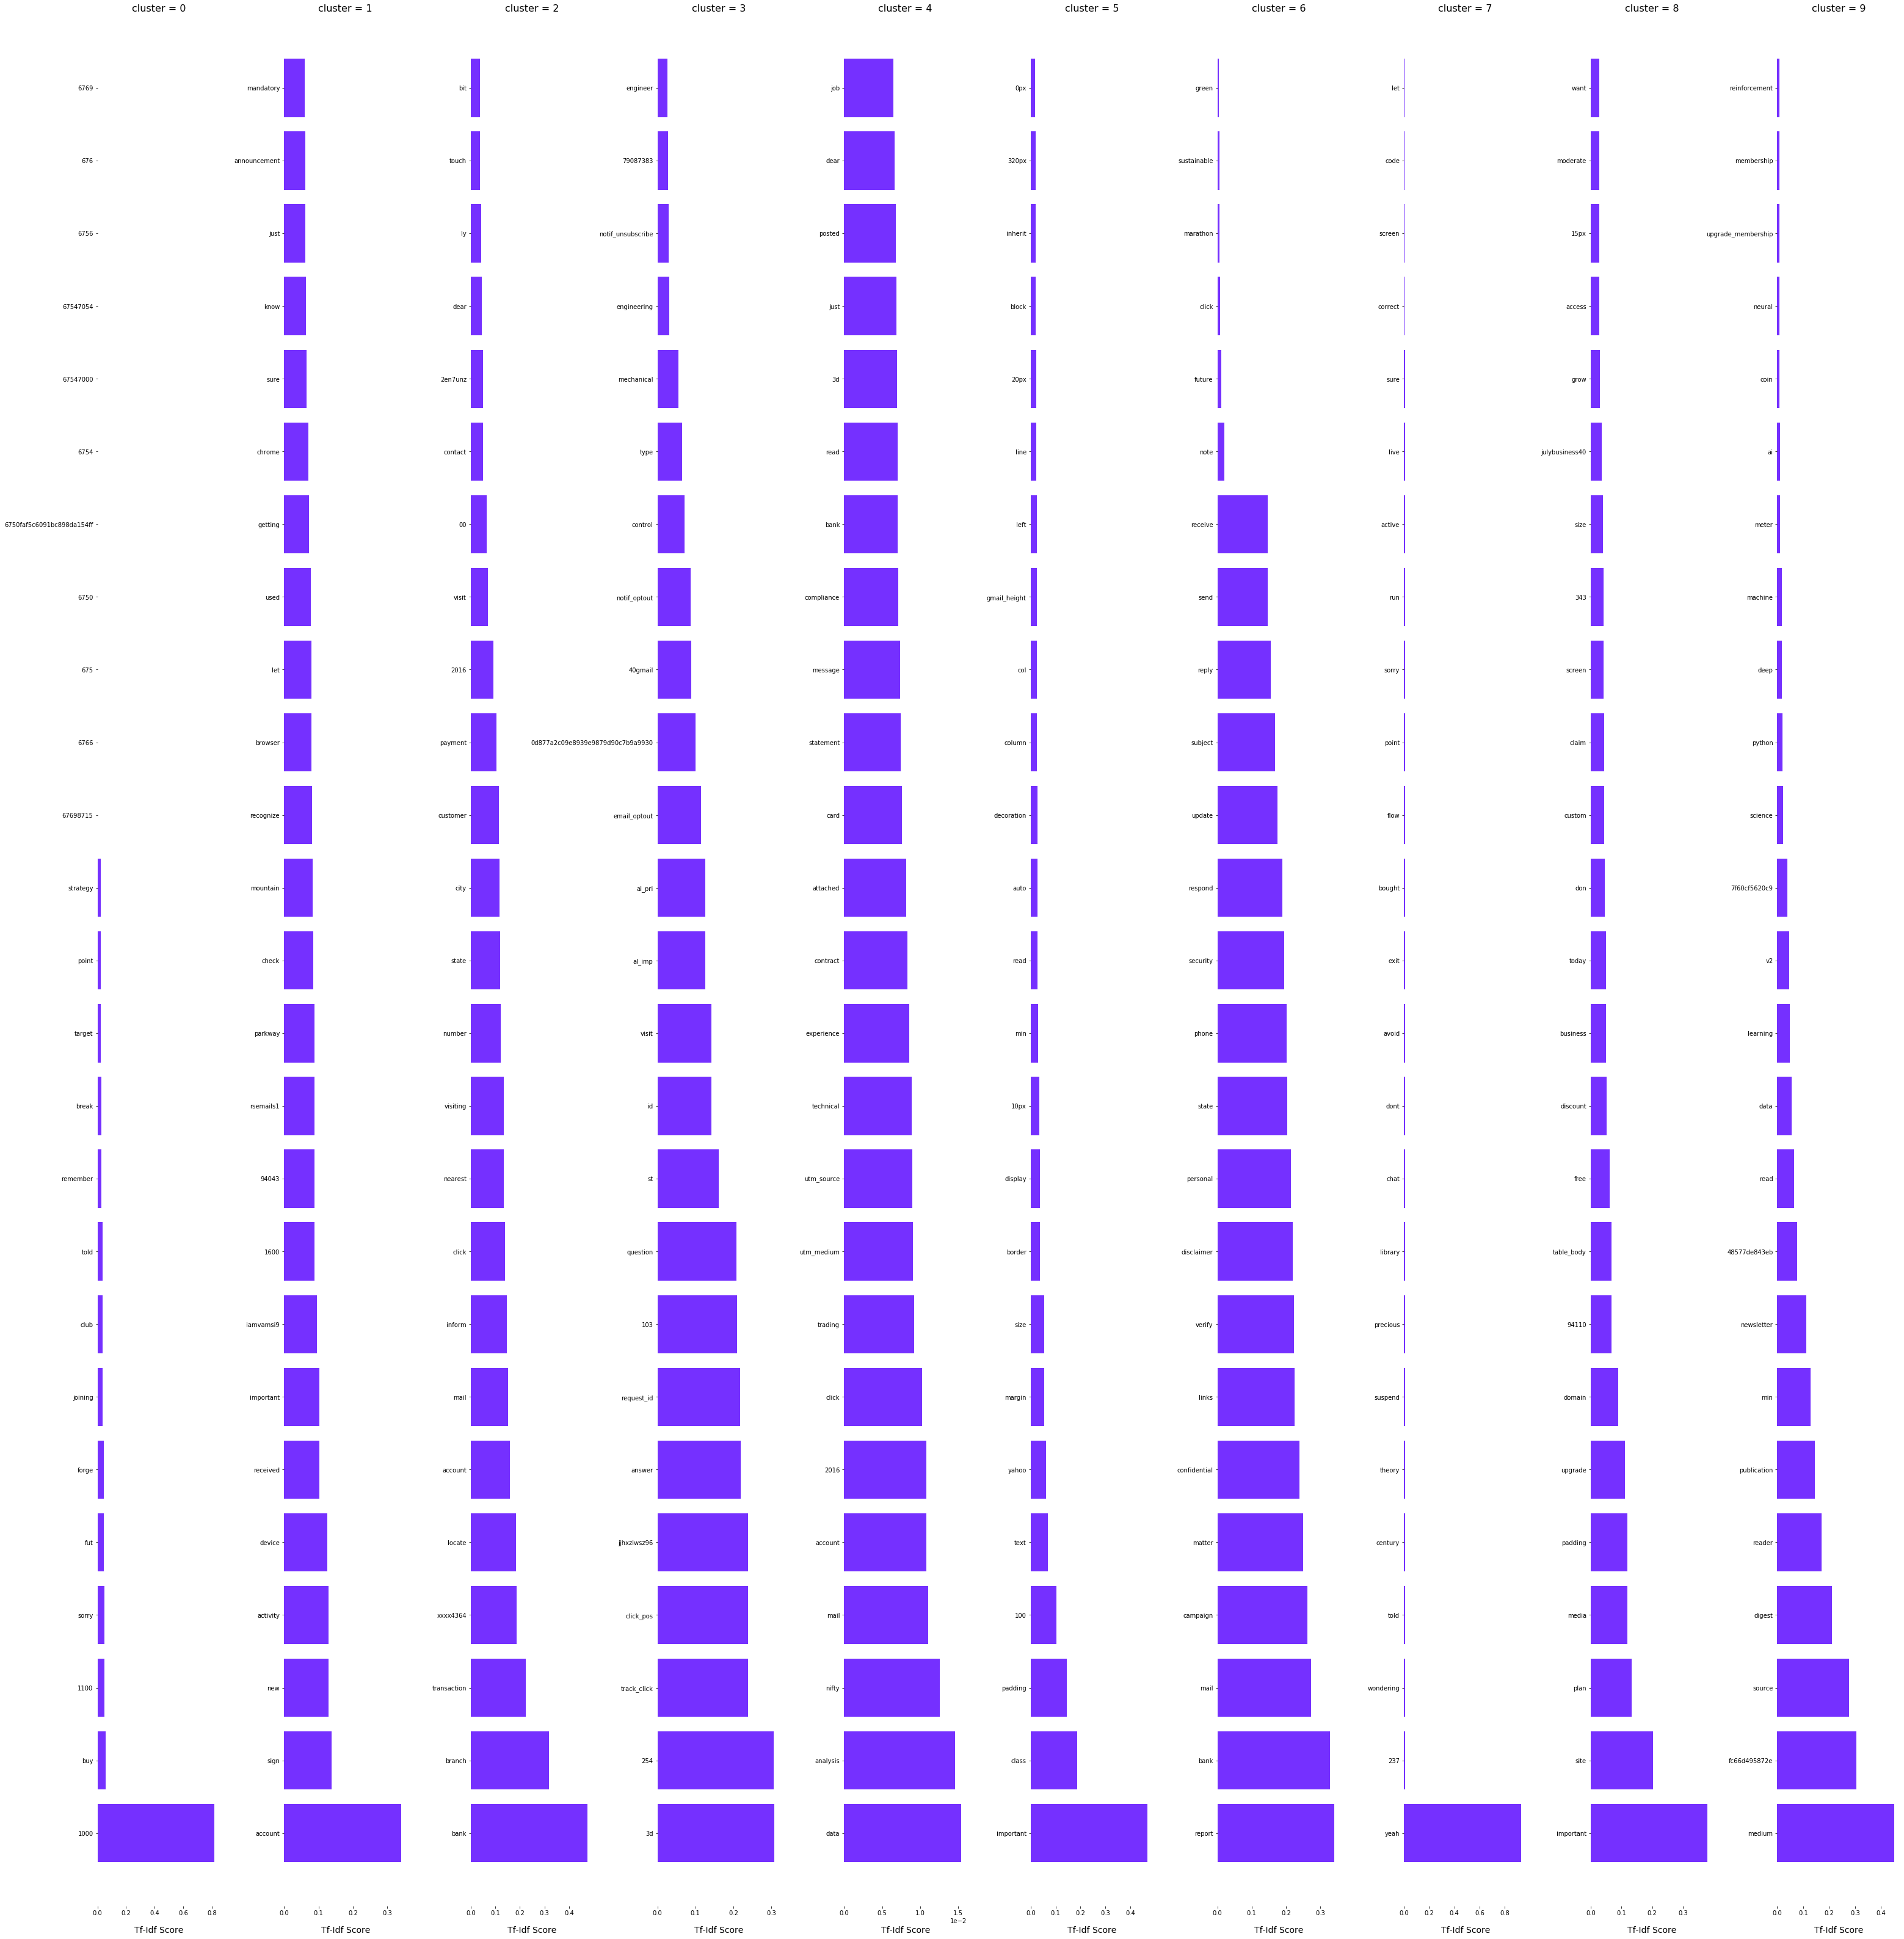

In [33]:
#Use this to print the top terms per cluster with matplotlib.
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

In [18]:
class EmailDataset: 
    def __init__(self):
        stopwords = ENGLISH_STOP_WORDS.union(['font','http','https','color','body','height','table','width','www'])
        self.vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
        self.emails = email_df['body'] 

        # train on the given email data.
        self.train()

    def train(self):
        self.vec_train = self.vec.fit_transform(self.emails)
  
    def query(self, keyword, limit):
        vec_keyword = self.vec.transform([keyword])
        cosine_sim = linear_kernel(vec_keyword, self.vec_train).flatten()
        related_email_indices = cosine_sim.argsort()[:-limit:-1]
        print(related_email_indices)
        return related_email_indices

    def find_email_by_index(self, i):
        return self.emails.as_matrix()[i]
    

In [19]:
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(email_df.body)

In [20]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(vec_train[0:1], vec_train).flatten()

In [21]:
query = "cheap"

In [22]:
vec_query = vec.transform([query])

cosine_sim = linear_kernel(vec_query, vec_train).flatten()

# Find top 10 most related emails to the query.
related_email_indices = cosine_sim.argsort()[:-10:-1]
# print out the indices of the 10 most related emails.
print(related_email_indices)

[23273  9412  8777 27854 11777 13136 11287  9705 11235]


In [23]:
first_email_index = related_email_indices[0]
print(email_df.body.to_numpy()[first_email_index])

Dear , We are now providing all the that you need for 2016 - - Click here Vision Current - All On Secure Second ARC at Cheap Economic Survey Score Budget , Economic Survey and Year Book Compilation Old Get all from anywhere in at cheap . Note : best directly from or | , test series and other , difficult to discover by across . Do not want to receive Free Stuff and other from . Click here to


In [24]:
ds = EmailDataset()
results = ds.query('love', 10)

[21470 23573 16513 20778  6946   901 20588 25827 22540]


In [25]:
for i in email_df.body.to_numpy()[results]:
    print(i)

I love
I love risk
its like international love
Sure , love to hear tales
Make the most of your music with Premium 🎶 Show some love Save to Your Library to get on you ’ love . Not feeling it ? Skip as many as you want . Get for : Android Other This message was sent to rsemails1 @ . . If you don ' t want to receive these from in the future , you your profile or . of Use Privacy Policy Contact Us , 45 W . 18th Street , 7th Floor , New York , 10011 ,
Find , , and more to share with all your . Valentine ' s Day Gift Guide Find something nice for every valentine on your list , from to . Shop now Get it at a price you ' love Compare on millions of from of . The to spark and rekindle romance . Shop now Modern love and popular for special . Shop now To you , from you Treat yourself – or someone else – to some me time . Shop now for family ... ... and who are like family Shop now Young love , , and for sweet . Shop now need love too Don ' t forget your best ( furry ) . Shop now Shop on the go wi